Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


<ipython-input-8-0c3686406b68>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rating"].fillna("Not Rated", inplace=True)
<ipython-input-8-0c3686406b68>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

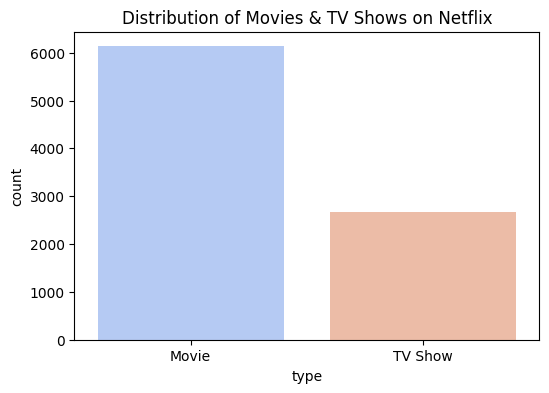

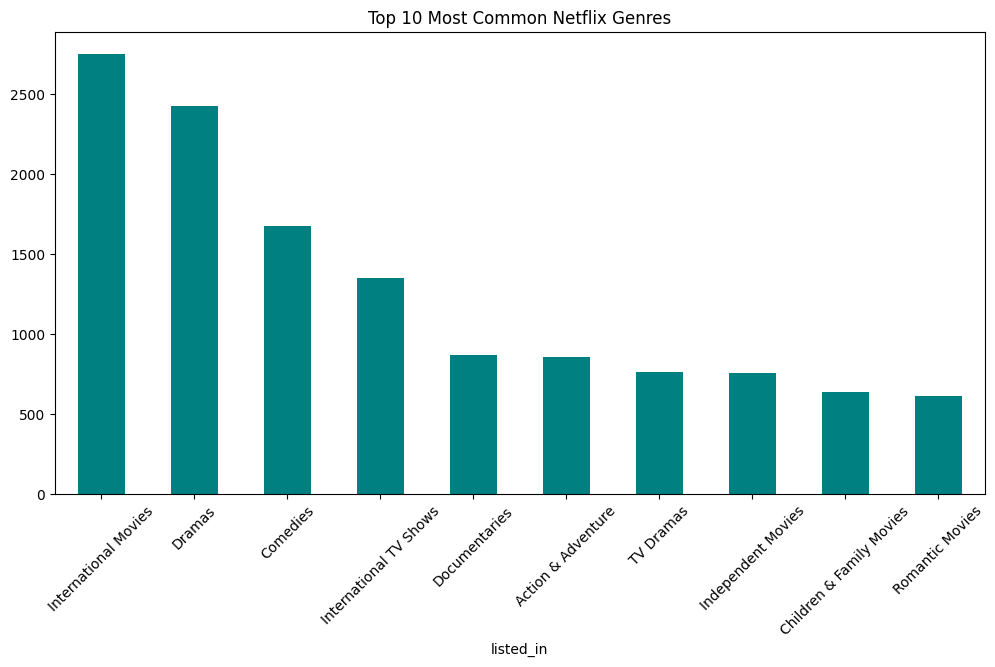

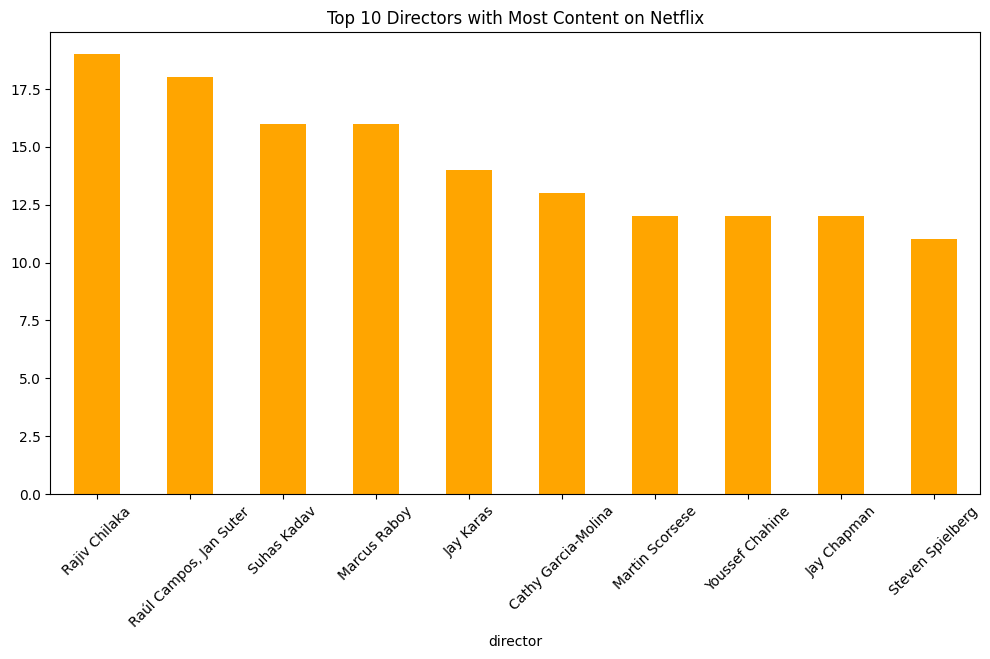

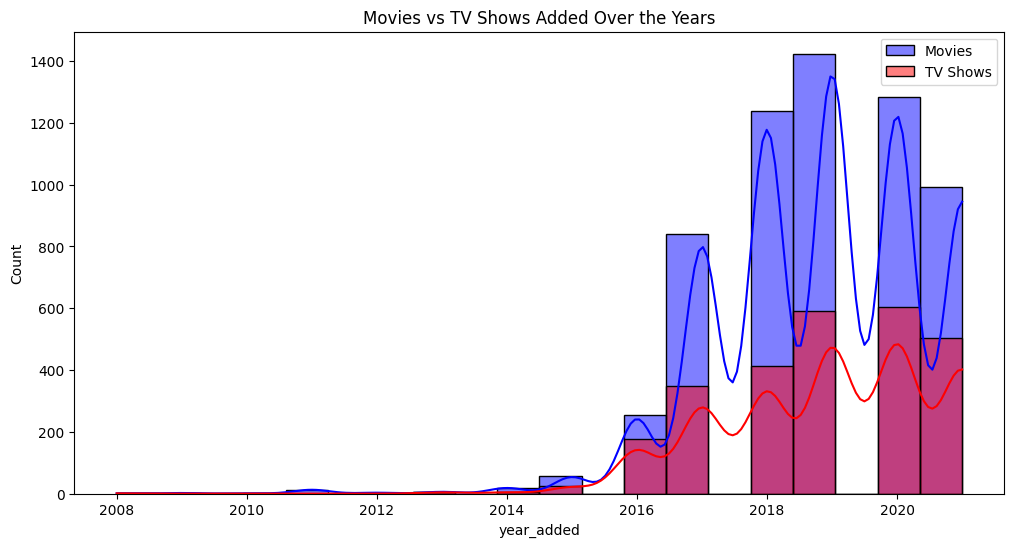

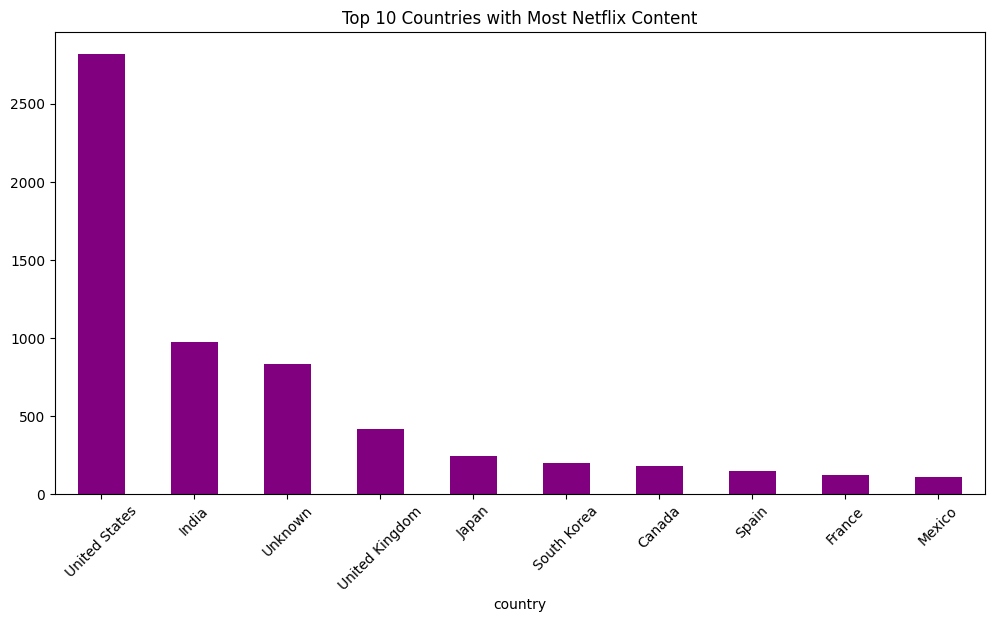

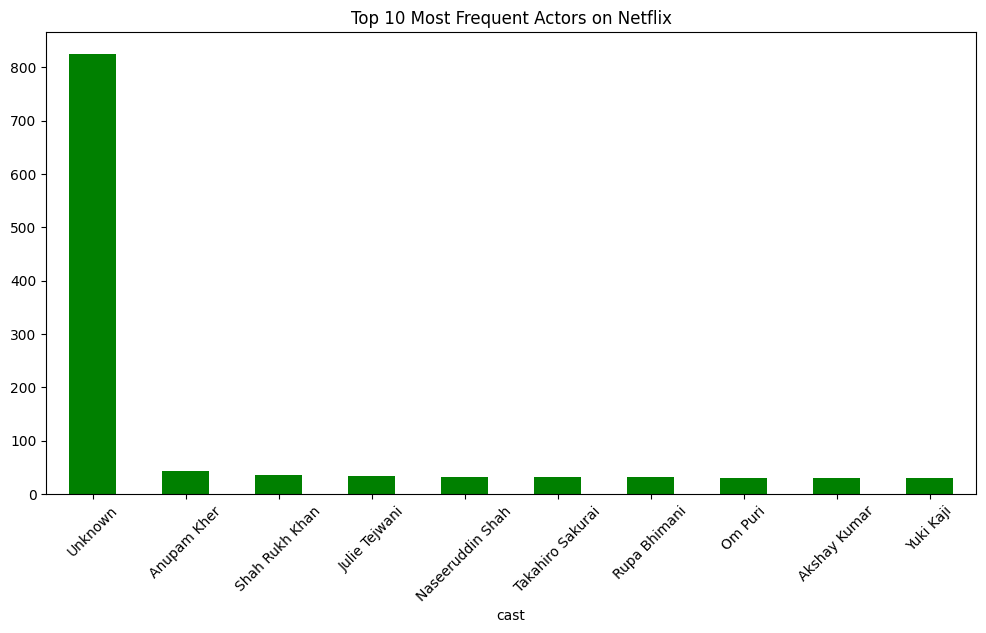

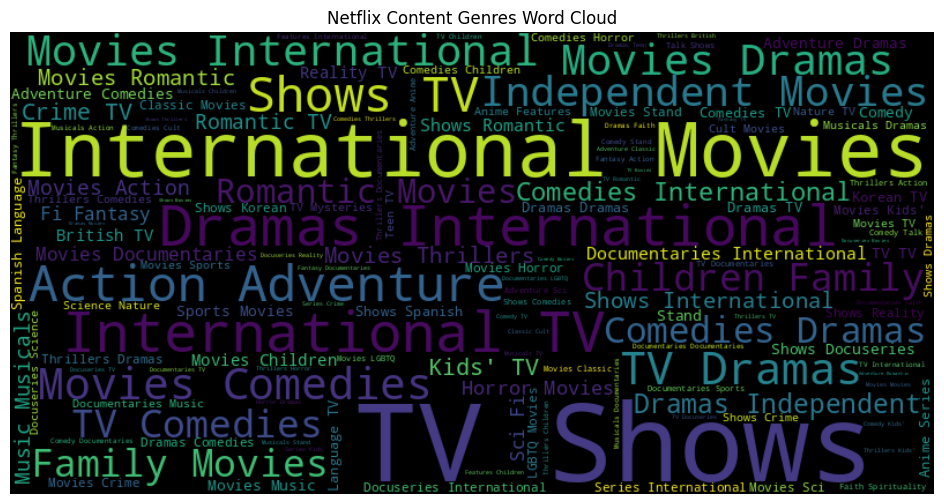

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load Netflix dataset
df = pd.read_csv("/content/netflix_titles.csv")

# ✅ 1. Missing Value Analysis
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values
df["rating"].fillna("Not Rated", inplace=True)
df["date_added"].fillna(df["date_added"].mode()[0], inplace=True)
df["country"].fillna("Unknown", inplace=True)
df["duration"].fillna("Unknown", inplace=True)
df["cast"].fillna("Unknown", inplace=True)

# ✅ 2. Convert "date_added" to datetime
df["date_added"] = pd.to_datetime(df["date_added"].str.strip(), errors='coerce')
df["year_added"] = df["date_added"].dt.year

# ✅ 3. Count of Movies vs TV Shows
plt.figure(figsize=(6, 4))
sns.countplot(x="type", data=df, palette="coolwarm")
plt.title("Distribution of Movies & TV Shows on Netflix")
plt.show()

# ✅ 4. Most common genres
plt.figure(figsize=(12, 6))
df["listed_in"].str.split(", ").explode().value_counts().head(10).plot(kind="bar", color="teal")
plt.title("Top 10 Most Common Netflix Genres")
plt.xticks(rotation=45)
plt.show()

# ✅ 5. Top 10 directors with most content
plt.figure(figsize=(12, 6))
df["director"].dropna().value_counts().head(10).plot(kind="bar", color="orange")
plt.title("Top 10 Directors with Most Content on Netflix")
plt.xticks(rotation=45)
plt.show()

# ✅ 6. Movies vs TV Shows Over the Years
plt.figure(figsize=(12, 6))
sns.histplot(df[df["type"] == "Movie"]["year_added"], bins=20, kde=True, color="blue", label="Movies")
sns.histplot(df[df["type"] == "TV Show"]["year_added"], bins=20, kde=True, color="red", label="TV Shows")
plt.title("Movies vs TV Shows Added Over the Years")
plt.legend()
plt.show()

# ✅ 7. Country-wise Content Distribution (Top 10)
plt.figure(figsize=(12, 6))
df["country"].value_counts().head(10).plot(kind="bar", color="purple")
plt.title("Top 10 Countries with Most Netflix Content")
plt.xticks(rotation=45)
plt.show()

# ✅ 8. Most Frequent Cast Members
plt.figure(figsize=(12, 6))
df["cast"].str.split(", ").explode().value_counts().head(10).plot(kind="bar", color="green")
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.xticks(rotation=45)
plt.show()

# ✅ 9. Word Cloud for Genres
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(" ".join(df["listed_in"].dropna()))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Netflix Content Genres Word Cloud")
plt.show()


